The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


In [2]:
# Read CSV 
data_2015 = pd.read_csv("2015.csv")
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
# Read CSV
data_2016 = pd.read_csv("2016.csv")
data_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
# Read CSV
data_2017 = pd.read_csv("2017.csv")
data_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [5]:
# Read CSV
data_2018 = pd.read_csv("2018.csv")
data_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [6]:
# Read CSV
data_2019 = pd.read_csv("2019.csv")
data_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
# Read CSV
data_density = pd.read_csv("population-density.csv")
data_density_2017 = data_density.loc[data_density['Year'] == 2017]
data_density_2017 = data_density_2017.reset_index(drop = True)
print(data_density_2017.shape)

data_density_2017.head()

(261, 4)


,Entity,Code,Year,Population density (people per sq. km of land area) (people per km² of land area)
0,Afghanistan,AFG,2017,54.422205
1,Albania,ALB,2017,104.870693
2,Algeria,DZA,2017,17.347874
3,American Samoa,ASM,2017,278.205000
4,Andorra,AND,2017,163.755319


In [37]:
data_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [10]:
# Merging happy_data and density_data for 2017
happy_density_2017 = data_2017.merge(data_density_2017, left_on='Country', right_on='Entity', how='inner')
happy_density_2017 = happy_density_2017.reset_index(drop = True)
happy_density_2017.shape

(146, 16)

In [64]:
# Happiness Rank vs Population Density
# Creating a rank for the density with df.rank()

happy_density_2017["Population Density Rank"] = happy_density_2017["Population density (people per sq. km of land area) (people per km² of land area)"].rank(method='first')  
happy_density_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Entity,Code,Year,Population density (people per sq. km of land area) (people per km² of land area),Density Rank,Population Density Rank
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Norway,NOR,2017,14.462136,16.0,16.0
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Denmark,DNK,2017,136.519876,106.0,106.0
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Iceland,ISL,2017,3.404329,4.0,4.0
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Switzerland,CHE,2017,214.242762,118.0,118.0
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Finland,FIN,2017,18.135848,24.0,24.0


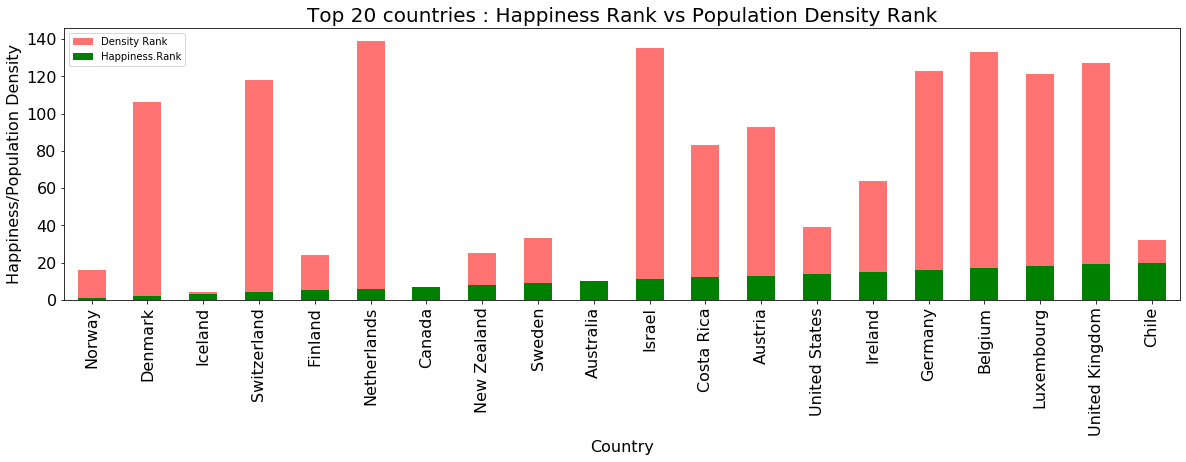

In [56]:
# Set x axis and tick locations
x_axis = np.arange(len(happy_density_2017[0:20]))
tick_locations = [value for value in x_axis]


_, ax = plt.subplots()
happy_density_2017['Density Rank'][0:20].plot(kind='bar', ax=ax , color='red',  alpha=0.55, figsize=(20,5), legend = 'Population Density',  fontsize=16)
happy_density_2017['Happiness.Rank'][0:20].plot(kind='bar', ax=ax, color='green', legend = 'Happiness Rank',  fontsize=16)
plt.xticks(tick_locations, happy_density_2017["Country"], rotation="vertical")

title='Top 20 countries : Happiness Rank vs Population Density Rank'
xlabel='Country'
ylabel='Happiness/Population Density'

ax.xtiks = happy_density_2017['Country']

plt.title(title, fontsize=20)
plt.xlabel(xlabel, fontsize=16)
plt.ylabel(ylabel, fontsize=16)
# ax.grid()

# # Create a legend for our chart
# plt.legend(handles=[Population_Density, Happiness_Rank], loc="best")

plt.show()


In [39]:
# Function to create Linear Regression plots

def linearRegrassionPlot(x_values, y_values, title, xlabel , ylabel, fileName = ''):

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept

        line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

        plt.scatter(x_values,y_values, marker="o", facecolors="b", edgecolors="r", alpha=0.55)
        plt.plot(x_values,regress_values,"r-")
        
        # Creating an extra space on the plot for the equation of the regression line
        plt.annotate(line_eq,(x_values.min() , y_values.max()+ 0.05 * y_values.max()),fontsize=14,color="red")

        # To change the size of your pie chart/figure
        fig = plt.gcf()
        fig.set_size_inches(8,5)

        # Creating a title, x label, and y label 
        plt.title(title, fontsize=18, color='purple', alpha=0.85)
        plt.xlabel(xlabel, fontsize=16)
        plt.ylabel(ylabel, fontsize=16)

        # Create x limits of our scatter plot 
        if x_values.max() > 0:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()) - 5, x_values.max() + 0.05 * x_values.max() + 5)
        else:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()) - 5, x_values.max() - 0.05 * x_values.max() + 5)

        # Create y limits of our scatter plot
        if y_values.max() > 0:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) - 5, y_values.max() + 0.10 * y_values.max() + 5)
        else:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) - 5, y_values.max() - 0.10 * y_values.max() + 5)

        print(f"The r-squared is: {rvalue}")
        print(f"The equation of the regression line is: {line_eq}")
        print(f"The p-value is: {pvalue}")

        # Save the plotted figures as .pngs
#         plt.savefig(fileName + '.png')

        plt.grid()
        plt.show()

The r-squared is: -0.07282635578685366
The equation of the regression line is: y = -0.08x + 81.99
The p-value is: 0.3823573051743563


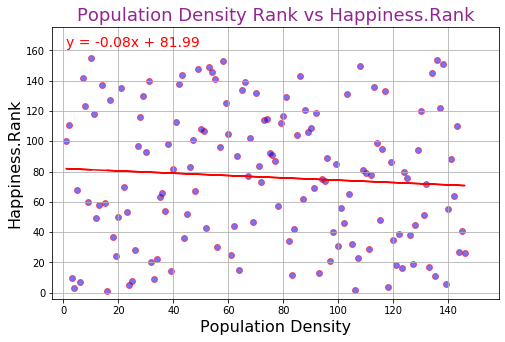

In [40]:
linearRegrassionPlot(happy_density_2017["Population Density Rank"] ,happy_density_2017["Happiness.Rank"], 'Population Density Rank vs Happiness.Rank', 'Population Density', 'Happiness.Rank')
                


The index published here presents a broad measure of human freedom, understood as the absence of coercive constraint. This fifth annual index uses 76 distinct indicators of personal and economic freedom in the following areas:

Rule of Law
Security and Safety
Movement
Religion
Association, Assembly, and Civil Society
Expression and Information
Identity and Relationships
Size of Government
Legal System and Property Rights
Access to Sound Money
Freedom to Trade Internationally
Regulation of Credit, Labor, and Business

In [87]:
# The Human Freedom Index - 2019
freedom_2017 = pd.read_csv("human-freedom-index-2019.csv")
data_2017.head()


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [88]:
freedom_2017.head()

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Albania,Eastern Europe,7.84,38,1,6.7,4.5,4.7,...,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,2017,DZA,Algeria,Middle East & North Africa,4.99,155,4,-,-,-,...,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159
2,2017,AGO,Angola,Sub-Saharan Africa,5.4,151,4,-,-,-,...,2.4,1.3,8.7,1.9,8.1,6.8,4.9,5.7,4.83,158
3,2017,ARG,Argentina,Latin America & the Caribbean,6.86,77,2,7.1,5.8,4.3,...,2.5,7.1,9.6,3.3,5.4,6.5,5.7,5.6,5.67,147
4,2017,ARM,Armenia,Caucasus & Central Asia,7.42,54,2,-,-,-,...,4.6,6.2,9.9,4.6,9.3,7.1,6.9,7.5,7.7,27


In [89]:
freedom_2017 = freedom_2017.loc[freedom_2017['year'] == 2017]
freedom_2017 = freedom_2017.reset_index(drop = True)



In [90]:
freedom_2017 = freedom_2017[['countries', 'ef_rank']]
freedom_2017.head()

,countries,ef_rank
0,Albania,30
1,Algeria,159
2,Angola,158
3,Argentina,147
4,Armenia,27


In [127]:
happy_freedom_2017 = data_2017.merge(freedom_2017, left_on = 'Country', right_on = 'countries', how = 'inner')
happy_freedom_2017['ef_rank'] = happy_freedom_2017['ef_rank'].astype(float)
happy_freedom_2017.head()


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,countries,ef_rank
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Norway,32.0
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Denmark,13.0
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Iceland,23.0
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Switzerland,4.0
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Finland,21.0


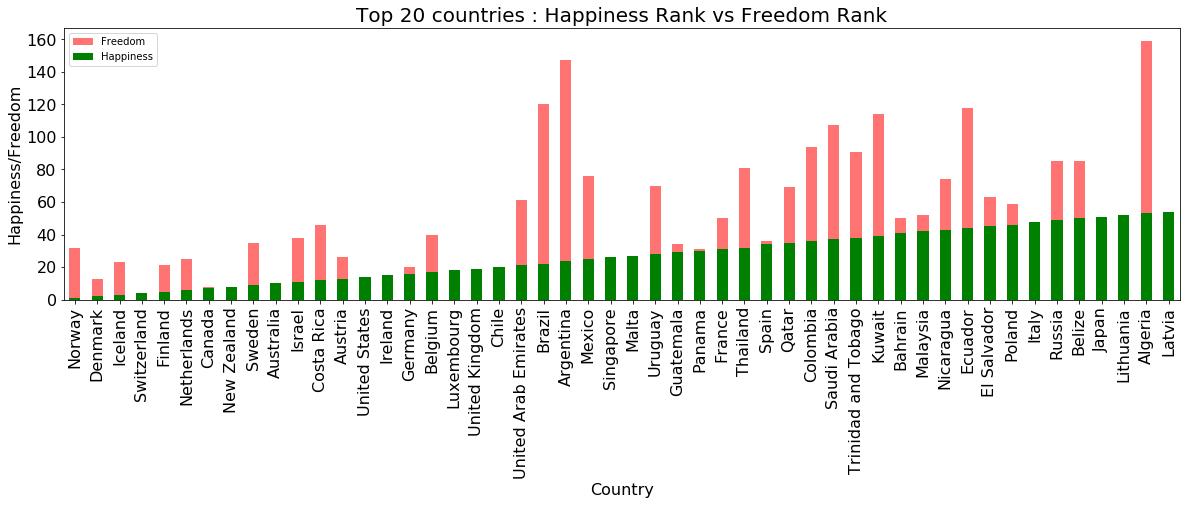

In [132]:
# Set x axis and tick locations
x_axis = np.arange(len(happy_freedom_2017[0:50]))
tick_locations = [value for value in x_axis]


_, ax = plt.subplots()
happy_freedom_2017['ef_rank'][0:50].plot(kind='bar', ax=ax , color='red',  alpha=0.55, figsize=(20,5), legend = 'Freedom',  fontsize=16)
happy_freedom_2017['Happiness.Rank'][0:50].plot(kind='bar', ax=ax, color='green', legend = 'Happiness',  fontsize=16)
plt.xticks(tick_locations, happy_freedom_2017["Country"], rotation="vertical")

title='Top 20 countries : Happiness Rank vs Freedom Rank'
xlabel='Country'
ylabel='Happiness/Freedom'

ax.xtiks = happy_freedom_2017['Country']

plt.title(title, fontsize=20)
plt.xlabel(xlabel, fontsize=16)
plt.ylabel(ylabel, fontsize=16)
# ax.grid()

# # Create a legend for our chart
plt.legend(['Freedom', 'Happiness'])


plt.show()


The r-squared is: 0.6090686158010536
The equation of the regression line is: y = 0.58x + 29.84
The p-value is: 5.799447698240429e-15


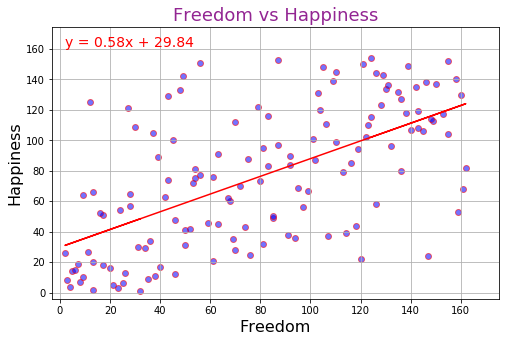

In [133]:
linearRegrassionPlot(happy_freedom_2017["ef_rank"] ,happy_freedom_2017["Happiness.Rank"], 'Freedom vs Happiness', 'Freedom', 'Happiness')
                
